In [ ]:
#!pip install pyagrum

In [ ]:
#!pip install numpy


In [ ]:
# Importing Related Libraries

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb


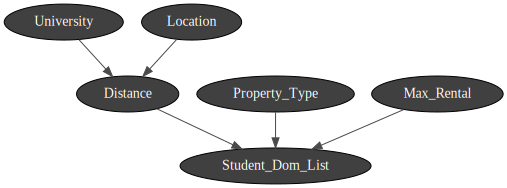

In [60]:
# Trail 2
# Creating the network
bn = gum.BayesNet('Student Wohnheim')

# Adding the related nodes and correspondence
University = bn.add(gum.LabelizedVariable('University', 'University',['HBRS_Sankt_Augustin', 'HBRS_Rheinbach', 'University_of_Bonn']))
Location = bn.add(gum.LabelizedVariable('Location', 'Location',['Sankt_Augustin', 'Rheinbach', 'Bonn']))
Distance = bn.add(gum.LabelizedVariable('Distance', 'Distance',['Near', 'Mid-Range', 'Far']))
Property_Type = bn.add(gum.LabelizedVariable('Property_Type', 'Property_Type',['Shared_Room','Apartment','Differently_Abled_Friendly_Apartment']))    
Max_Rental = bn.add(gum.LabelizedVariable('Max_Rental', 'Max_Rental',['Between_200_500','Between_500_900']))
Student_Dom_List = bn.add(gum.LabelizedVariable('Student_Dom_List', 'Student_Dom_List',['WOHNHEIM AM RÖMERLAGER',
                                                                                        'WOHNHEIM AM WICHELSHOF',
                                                                                        'WOHNHEIM BISMARCKSTRASS',
                                                                                        'WOHNHEIM ENDENICHER ALLEE 17',
                                                                                        'WOHNHEIM EUROPARING',
                                                                                        'WOHNHEIM HIRSCHBERGER STRASSE (TANNENBUSCH II)',
                                                                                        'WOHNHEIM JAGDWEG 24',
                                                                                        'WOHNHEIM KERAMIKERSTRASSE',
                                                                                        'WOHNHEIM KIRSCHALLEE 3A/B',
                                                                                        'WOHNHEIM POSENER WEG/OPPELNER STRASSE/RIESENGEBIRGSSTRASSE']))

# Make sure always return a statement of your room confiramtion will be sent as a mail within a week.

# Adding the arcs
bn.addArc(University, Distance)
bn.addArc(Location, Distance)
bn.addArc(Property_Type, Student_Dom_List)
bn.addArc(Max_Rental, Student_Dom_List)
bn.addArc(Distance,Student_Dom_List)
    
gnb.showBN(bn, size="10")


In [64]:
# Trail_2
# Adding CPT's

'''
The fill with values are initalised and they are initialised as per our validated assumptions.
'''

bn.cpt(Location).fillWith([0.3334,0.3333,0.3333])
bn.cpt(University).fillWith([0.3334,0.3333,0.3333])
bn.cpt(Max_Rental).fillWith([0.6,0.4])
bn.cpt(Property_Type).fillWith([0.3334,0.3333,0.3333])

# LHS - Part of the BN Chart
# For Based on the distance the probability is given

# This has to be changed with 3 prob. values this why it is throwing errors --> [Error Resolved]
'''
The probabilty of the below values are given based on the distance from the university and the location of interest.
'''
# Distance = ['Near', 'Mid-Range', 'Far']

bn.cpt(Distance)[{'Location': 'Sankt_Augustin','University':'HBRS_Sankt_Augustin'}] = [0.6,0.25,0.15]
bn.cpt(Distance)[{'Location': 'Rheinbach','University': 'HBRS_Sankt_Augustin'}] = [0.25,0.6,0.15]
bn.cpt(Distance)[{'Location': 'Bonn','University': 'HBRS_Sankt_Augustin'}] = [0.15,0.25,0.6]

bn.cpt(Distance)[{'Location': 'Sankt_Augustin','University': 'HBRS_Rheinbach'}] = [0.15,0.25,0.6]
bn.cpt(Distance)[{'Location': 'Rheinbach','University': 'HBRS_Rheinbach'}] = [0.6,0.25,0.15]
bn.cpt(Distance)[{'Location': 'Bonn','University': 'HBRS_Rheinbach'}] = [0.25,0.6,0.15]

bn.cpt(Distance)[{'Location': 'Sankt_Augustin','University': 'University_of_Bonn'}] = [0.15,0.25,0.6]
bn.cpt(Distance)[{'Location': 'Rheinbach','University': 'University_of_Bonn'}] = [0.25,0.6,0.15]
bn.cpt(Distance)[{'Location': 'Bonn','University': 'University_of_Bonn'}] = [0.6,0.25,0.15]

# Final Node
'''
The values are given based on the distance, property type and the max rental amount for every single student domitory.
The list of student domitory is given below.
1. WOHNHEIM AM RÖMERLAGER 
2. WOHNHEIM AM WICHELSHOF   
3. WOHNHEIM BISMARCKSTRASS 
4. WOHNHEIM ENDENICHER ALLEE 17
5. WOHNHEIM EUROPARING  
6. WOHNHEIM HIRSCHBERGER STRASSE (TANNENBUSCH II) ("This Dormitory has differently abled friendly apartments")
7. WOHNHEIM JAGDWEG 24
8. WOHNHEIM KERAMIKERSTRASSE   
9. WOHNHEIM KIRSCHALLEE 3A/B   
10. WOHNHEIM POSENER WEG/OPPELNER STRASSE/RIESENGEBIRGSSTRASSE
'''
# Trail_2
# Adding CPT's for the final node with all possible combinations

# For Sankt_Auguistin
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.2,0.2,0.2,0.2,0.7,0.2,0.2,0.4,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.2,0.2,0.2,0.2,0.6,0.2,0.2,0.4,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.2,0.2,0.2,0.2,0.4,0.2,0.2,0.6,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.2,0.2,0.2,0.2,0.7,0.2,0.2,0.4,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.6,0.6,0.6,0.6,0.2,0.6,0.6,0.4,0.6,0.6]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.6,0.6,0.6,0.6,0.2,0.6,0.6,0.4,0.6,0.6]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.2,0.2,0.2,0.2,0.2,0.6,0.2,0.2,0.2,0.2]

# # ## For Rheinbach
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.4,0.4,0.4,0.4,0.2,0.4,0.4,0.6,0.4,0.4]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.4,0.4,0.4,0.4,0.2,0.4,0.4,0.6,0.4,0.4]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.6,0.6,0.6,0.6,0.2,0.6,0.6,0.4,0.6,0.6]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.6,0.6,0.6,0.6,0.2,0.6,0.6,0.4,0.6,0.6]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.2,0.2,0.2,0.2,0.6,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.4,0.4,0.4,0.4,0.6,0.4,0.4,0.2,0.4,0.4]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.4,0.4,0.4,0.4,0.6,0.4,0.4,0.2,0.4,0.4]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.4,0.4,0.4,0.4,0.6,0.4,0.4,0.2,0.4,0.4]

# ## For Bonn
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.6,0.6,0.6,0.6,0.2,0.6,0.6,0.4,0.6,0.6]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}]  = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.6,0.6,0.6,0.6,0.2,0.6,0.6,0.4,0.6,0.6]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.4,0.4,0.4,0.4,0.2,0.6,0.4,0.3,0.4,0.4]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.4,0.4,0.4,0.4,0.2,0.4,0.4,0.6,0.4,0.4]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.4,0.4,0.4,0.4,0.2,0.4,0.4,0.6,0.4,0.4]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.2,0.2,0.2,0.2,0.2,0.6,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.2,0.2,0.2,0.2,0.6,0.2,0.2,0.4,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.2,0.2,0.2,0.2,0.6,0.2,0.2,0.4,0.2,0.2]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]

bn.check()

('Variable Student_Dom_List : with (at least) parents <Property_Type:Shared_Room|Max_Rental:Between_200_500|Distance:Near>, the CPT sum to more than 1.',)

In [63]:
# Inference With Evidence

ie = gum.LazyPropagation(bn)
# ie.makeInference()
ie.setEvidence({'Location':'Sankt_Augustin','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'})
ie.makeInference()
ie.posterior(Student_Dom_List)


(pyAgrum.Potential<double>@0x2309fe0) 
  Student_Dom_List                                                                                 |
WOHNHEIM |WOHNHEIM |WOHNHEIM |WOHNHEIM |WOHNHEIM |WOHNHEIM |WOHNHEIM |WOHNHEIM |WOHNHEIM |WOHNHEIM |
---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
 0.1111  | 0.1111  | 0.1111  | 0.1111  | 0.0370  | 0.1111  | 0.1111  | 0.0741  | 0.1111  | 0.1111  |

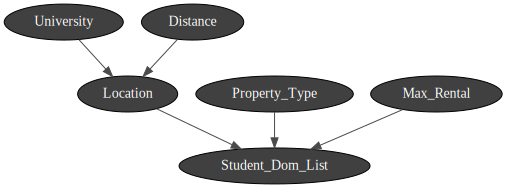

In [67]:
# Trail 3
# Creating the network
bn = gum.BayesNet('Student Wohnheim')

# Adding the related nodes and correspondence
University = bn.add(gum.LabelizedVariable('University', 'University',['HBRS_Sankt_Augustin', 'HBRS_Rheinbach', 'University_of_Bonn']))
Location = bn.add(gum.LabelizedVariable('Location', 'Location',['Sankt_Augustin', 'Rheinbach', 'Bonn']))
Distance = bn.add(gum.LabelizedVariable('Distance', 'Distance',['Near', 'Mid-Range', 'Far']))
Property_Type = bn.add(gum.LabelizedVariable('Property_Type', 'Property_Type',['Shared_Room','Apartment','Differently_Abled_Friendly_Apartment']))    
Max_Rental = bn.add(gum.LabelizedVariable('Max_Rental', 'Max_Rental',['Between_200_500','Between_500_900']))
Student_Dom_List = bn.add(gum.LabelizedVariable('Student_Dom_List', 'Student_Dom_List',['WOHNHEIM AM RÖMERLAGER',
                                                                                        'WOHNHEIM AM WICHELSHOF',
                                                                                        'WOHNHEIM BISMARCKSTRASS',
                                                                                        'WOHNHEIM ENDENICHER ALLEE 17',
                                                                                        'WOHNHEIM EUROPARING',
                                                                                        'WOHNHEIM HIRSCHBERGER STRASSE (TANNENBUSCH II)',
                                                                                        'WOHNHEIM JAGDWEG 24',
                                                                                        'WOHNHEIM KERAMIKERSTRASSE',
                                                                                        'WOHNHEIM KIRSCHALLEE 3A/B',
                                                                                        'WOHNHEIM POSENER WEG/OPPELNER STRASSE/RIESENGEBIRGSSTRASSE']))

# Make sure always return a statement of your room confiramtion will be sent as a mail within a week.

# Adding the arcs
bn.addArc(University, Location)
bn.addArc(Distance, Location)
bn.addArc(Property_Type, Student_Dom_List)
bn.addArc(Max_Rental, Student_Dom_List)
bn.addArc(Location,Student_Dom_List)
    
gnb.showBN(bn, size="10")


In [68]:
# Trial_3

# Adding CPT's

'''
The fill with values are initalised and they are initialised as per our validated assumptions.
'''

bn.cpt(Distance).fillWith([0.6,0.25,0.15])
bn.cpt(University).fillWith([0.3334,0.3333,0.3333])
bn.cpt(Max_Rental).fillWith([0.6,0.4])
bn.cpt(Property_Type).fillWith([0.3334,0.3333,0.3333])

# # LHS - Part of the BN Chart
# # For Based on the distance the probability is given

# # This has to be changed with 3 prob. values this why it is throwing errors --> [Error Resolved]
# '''
# The probabilty of the below values are given based on the distance from the university and the location of interest.
# '''
# # Distance = ['Near', 'Mid-Range', 'Far']
# # Location = ['Sankt_Augustin', 'Rheinbach', 'Bonn']
bn.cpt(Location)[{'University': 'HBRS_Sankt_Augustin','Distance': 'Near'}] = [0.6,0.25,0.15]
bn.cpt(Location)[{'University': 'HBRS_Sankt_Augustin','Distance': 'Mid-Range'}] = [0.25,0.6,0.15]
bn.cpt(Location)[{'University': 'HBRS_Sankt_Augustin','Distance': 'Far'}] = [0.15,0.25,0.6]

bn.cpt(Location)[{'University': 'HBRS_Rheinbach','Distance': 'Near'}] = [0.15,0.25,0.6]
bn.cpt(Location)[{'University': 'HBRS_Rheinbach','Distance': 'Mid-Range'}] = [0.6,0.25,0.15]
bn.cpt(Location)[{'University': 'HBRS_Rheinbach','Distance': 'Far'}] = [0.25,0.6,0.15]

bn.cpt(Location)[{'University': 'University_of_Bonn','Distance': 'Near'}] = [0.15,0.25,0.6]
bn.cpt(Location)[{'University': 'University_of_Bonn','Distance': 'Mid-Range'}] = [0.25,0.6,0.15]
bn.cpt(Location)[{'University': 'University_of_Bonn','Distance': 'Far'}] = [0.6,0.25,0.15]

# # Final Node
# '''
# The values are given based on the distance, property type and the max rental amount for every single student domitory.
# The list of student domitory is given below.
# 1. WOHNHEIM AM RÖMERLAGER 
# 2. WOHNHEIM AM WICHELSHOF   
# 3. WOHNHEIM BISMARCKSTRASS 
# 4. WOHNHEIM ENDENICHER ALLEE 17
# 5. WOHNHEIM EUROPARING  (Sankt_Augustin)
# 6. WOHNHEIM HIRSCHBERGER STRASSE (TANNENBUSCH II) ("This Dormitory has differently abled friendly apartments")
# 7. WOHNHEIM JAGDWEG 24
# 8. WOHNHEIM KERAMIKERSTRASSE  (Rheinbach)) 
# 9. WOHNHEIM KIRSCHALLEE 3A/B   
# 10. WOHNHEIM POSENER WEG/OPPELNER STRASSE/RIESENGEBIRGSSTRASSE
# '''

# what should be the value given to the things whcih are not possible to attain 1 probability
# Why only the dom of sankt augustin is spiking up???

bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.0448,0.0444,0.0448,0.0444,0.6,0.0444,0.0444,0.0444,0.044,0.044]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.0448,0.0444,0.0448,0.0444,0.6,0.0444,0.0444,0.0444,0.0444,0.0444]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]

bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.0448,0.0444,0.0448,0.0444,0.0444,0.0444,0.0444,0.6,0.0444,0.0444]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.0448,0.0444,0.0448,0.0444,0.044,0.0444,0.0444,0.6,0.0444,0.0444]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]

bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.1125,0.1125,0.1125,0.1125,0.05,0.1125,0.1125,0.05,0.1125,0.1125]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.1125,0.1125,0.1125,0.1125,0.05,0.1125,0.1125,0.05,0.1125,0.1125]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.0429,0.0429,0.0429,0.0429,0.05,0.6,0.0429,0.05,0.0429,0.0426]

## For Rheinbach
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.0448,0.0444,0.0448,0.0444,0.0444,0.0444,0.0444,0.6,0.0444,0.0444]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.6,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.0444,0.0444,0.0448,0.0444,0.044,0.0444,0.0444,0.6,0.0444,0.0444]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]

bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.1125,0.1125,0.1125,0.1125,0.05,0.1125,0.1125,0.05,0.1125,0.1125]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.1125,0.1125,0.1125,0.1125,0.05,0.1125,0.1125,0.05,0.1125,0.1125]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.0429,0.0429,0.0429,0.0429,0.05,0.6,0.0429,0.05,0.0429,0.0426]

bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.0448,0.0444,0.0448,0.0444,0.6,0.0444,0.0444,0.0444,0.0444,0.0444]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.0444,0.0444,0.0448,0.0444,0.6,0.0444,0.0444,0.0444,0.0444,0.0444]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]

## For Bonn
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.1125,0.1125,0.1125,0.1125,0.05,0.1125,0.1125,0.05,0.1125,0.1125]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}]  = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.1125,0.1125,0.1125,0.1125,0.05,0.1125,0.1125,0.05,0.1125,0.1125]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.0429,0.0429,0.0429,0.0429,0.05,0.6,0.0429,0.05,0.0429,0.0426]

bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.0448,0.0444,0.0448,0.0444,0.0444,0.0444,0.0444,0.6,0.0444,0.0444]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.0444,0.0444,0.0448,0.0444,0.044,0.0444,0.0444,0.6,0.0444,0.0444]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]

bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.0448,0.0444,0.0448,0.0444,0.6,0.0444,0.0444,0.0444,0.0444,0.0444]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.6,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.0444,0.0444,0.0448,0.0444,0.6,0.0444,0.0444,0.0444,0.0444,0.0444]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]


In [82]:
# Trial_5
## Removing the Distance.

# Adding CPT's

'''
The fill with values are initalised and they are initialised as per our validated assumptions.
'''

bn.cpt(Distance).fillWith([0.6,0.25,0.15])
bn.cpt(University).fillWith([0.3334,0.3333,0.3333])
bn.cpt(Max_Rental).fillWith([0.6,0.4])
bn.cpt(Property_Type).fillWith([0.3334,0.3333,0.3333])

# # LHS - Part of the BN Chart
# # For Based on the distance the probability is given

# # This has to be changed with 3 prob. values this why it is throwing errors --> [Error Resolved]
# '''
# The probabilty of the below values are given based on the distance from the university and the location of interest.
# '''
# # Distance = ['Near', 'Mid-Range', 'Far']
# # Location = ['Sankt_Augustin', 'Rheinbach', 'Bonn']
bn.cpt(Location)[{'University': 'HBRS_Sankt_Augustin','Distance': 'Near'}] = [0.6,0.25,0.15]
bn.cpt(Location)[{'University': 'HBRS_Sankt_Augustin','Distance': 'Mid-Range'}] = [0.25,0.6,0.15]
bn.cpt(Location)[{'University': 'HBRS_Sankt_Augustin','Distance': 'Far'}] = [0.15,0.25,0.6]

bn.cpt(Location)[{'University': 'HBRS_Rheinbach','Distance': 'Near'}] = [0.15,0.25,0.6]
bn.cpt(Location)[{'University': 'HBRS_Rheinbach','Distance': 'Mid-Range'}] = [0.6,0.25,0.15]
bn.cpt(Location)[{'University': 'HBRS_Rheinbach','Distance': 'Far'}] = [0.25,0.6,0.15]

bn.cpt(Location)[{'University': 'University_of_Bonn','Distance': 'Near'}] = [0.15,0.25,0.6]
bn.cpt(Location)[{'University': 'University_of_Bonn','Distance': 'Mid-Range'}] = [0.25,0.6,0.15]
bn.cpt(Location)[{'University': 'University_of_Bonn','Distance': 'Far'}] = [0.6,0.25,0.15]

# # Final Node
# '''
# The values are given based on the distance, property type and the max rental amount for every single student domitory.
# The list of student domitory is given below.
# 1. WOHNHEIM AM RÖMERLAGER 
# 2. WOHNHEIM AM WICHELSHOF   
# 3. WOHNHEIM BISMARCKSTRASS 
# 4. WOHNHEIM ENDENICHER ALLEE 17
# 5. WOHNHEIM EUROPARING  (Sankt_Augustin)
# 6. WOHNHEIM HIRSCHBERGER STRASSE (TANNENBUSCH II) ("This Dormitory has differently abled friendly apartments")
# 7. WOHNHEIM JAGDWEG 24
# 8. WOHNHEIM KERAMIKERSTRASSE  (Rheinbach)) 
# 9. WOHNHEIM KIRSCHALLEE 3A/B   
# 10. WOHNHEIM POSENER WEG/OPPELNER STRASSE/RIESENGEBIRGSSTRASSE
# '''

# what should be the value given to the things whcih are not possible to attain 1 probability
# Why only the dom of sankt augustin is spiking up???

bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.0448,0.0444,0.0448,0.0444,0.6,0.0444,0.0444,0.0444,0.044,0.044]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1] 

bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.0448,0.0444,0.0448,0.0444,0.6,0.0444,0.0444,0.044,0.0444,0.0444]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.0448,0.0444,0.0448,0.0444,0.044,0.0444,0.0444,0.6,0.0444,0.0444]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.1,0.1,0.1,0.1,0.1,0.6,0.1,0.1,0.1,0.1]

bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.1,0.1,0.1,0.1,0.6,0.1,0.1,0.1,0.1,0.1]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.0444,0.0444,0.0448,0.0444,0.044,0.0444,0.0444,0.6,0.0444,0.0444]
bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.1,0.1,0.1,0.1,0.6,0.1,0.1,0.1,0.1,0.1]

bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.1125,0.1125,0.1125,0.1125,0.05,0.1125,0.1125,0.05,0.1125,0.1125]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.1125,0.1125,0.1125,0.1125,0.05,0.1125,0.1125,0.05,0.1125,0.1125]
bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]


# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.0448,0.0444,0.0448,0.0444,0.6,0.0444,0.0444,0.0444,0.044,0.044]
# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.0448,0.0444,0.0448,0.0444,0.6,0.0444,0.0444,0.0444,0.0444,0.0444]
# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]

# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.0448,0.0444,0.0448,0.0444,0.0444,0.0444,0.0444,0.6,0.0444,0.0444]
# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.0448,0.0444,0.0448,0.0444,0.044,0.0444,0.0444,0.6,0.0444,0.0444]
# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]

# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.1125,0.1125,0.1125,0.1125,0.05,0.1125,0.1125,0.05,0.1125,0.1125]
# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.1125,0.1125,0.1125,0.1125,0.05,0.1125,0.1125,0.05,0.1125,0.1125]
# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.0429,0.0429,0.0429,0.0429,0.05,0.6,0.0429,0.05,0.0429,0.0426]

# ## For Rheinbach
# bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.0448,0.0444,0.0448,0.0444,0.0444,0.0444,0.0444,0.6,0.0444,0.0444]
# bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.6,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.0444,0.0444,0.0448,0.0444,0.044,0.0444,0.0444,0.6,0.0444,0.0444]
# bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]

# bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.1125,0.1125,0.1125,0.1125,0.05,0.1125,0.1125,0.05,0.1125,0.1125]
# bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.1125,0.1125,0.1125,0.1125,0.05,0.1125,0.1125,0.05,0.1125,0.1125]
# bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.0429,0.0429,0.0429,0.0429,0.05,0.6,0.0429,0.05,0.0429,0.0426]

# bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.0448,0.0444,0.0448,0.0444,0.6,0.0444,0.0444,0.0444,0.0444,0.0444]
# bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.0444,0.0444,0.0448,0.0444,0.6,0.0444,0.0444,0.0444,0.0444,0.0444]
# bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]

# ## For Bonn
# bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.1125,0.1125,0.1125,0.1125,0.05,0.1125,0.1125,0.05,0.1125,0.1125]
# bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}]  = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.1125,0.1125,0.1125,0.1125,0.05,0.1125,0.1125,0.05,0.1125,0.1125]
# bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.0429,0.0429,0.0429,0.0429,0.05,0.6,0.0429,0.05,0.0429,0.0426]

# bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.0448,0.0444,0.0448,0.0444,0.0444,0.0444,0.0444,0.6,0.0444,0.0444]
# bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.0444,0.0444,0.0448,0.0444,0.044,0.0444,0.0444,0.6,0.0444,0.0444]
# bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]

# bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.0448,0.0444,0.0448,0.0444,0.6,0.0444,0.0444,0.0444,0.0444,0.0444]
# bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.6,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.0444,0.0444,0.0448,0.0444,0.6,0.0444,0.0444,0.0444,0.0444,0.0444]
# bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]


In [ ]:
# Inference_Part
# Whats funny is that you dont need this thing.
ie = gum.LazyPropagation(bn)

# Inference without evidence

ie.makeInference()
ie.addJointTarget(set([Location,University,Max_Rental,Property_Type,Student_Dom_List,Distance]))
ie.jointPosterior(set([Location,University,Max_Rental,Property_Type,Student_Dom_List,Distance]))


In [100]:
# Inference With Evidence

ie = gum.LazyPropagation(bn)
# ie.makeInference()
ie.setEvidence({'Location':'Rheinbach','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'})
ie.makeInference()
ie.posterior(Student_Dom_List)


(pyAgrum.Potential<double>@0x101b860) 
  Student_Dom_List                                                                                 |
WOHNHEIM |WOHNHEIM |WOHNHEIM |WOHNHEIM |WOHNHEIM |WOHNHEIM |WOHNHEIM |WOHNHEIM |WOHNHEIM |WOHNHEIM |
---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
 0.0448  | 0.0444  | 0.0448  | 0.0444  | 0.0440  | 0.0444  | 0.0444  | 0.6000  | 0.0444  | 0.0444  |

In [36]:
print(ie.posterior(Student_Dom_List))


  Student_Dom_List                                                                                 |
WOHNHEIM |WOHNHEIM |WOHNHEIM |WOHNHEIM |WOHNHEIM |WOHNHEIM |WOHNHEIM |WOHNHEIM |WOHNHEIM |WOHNHEIM |
---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
 0.1125  | 0.1125  | 0.1125  | 0.1125  | 0.0500  | 0.1125  | 0.1125  | 0.0500  | 0.1125  | 0.1125  |



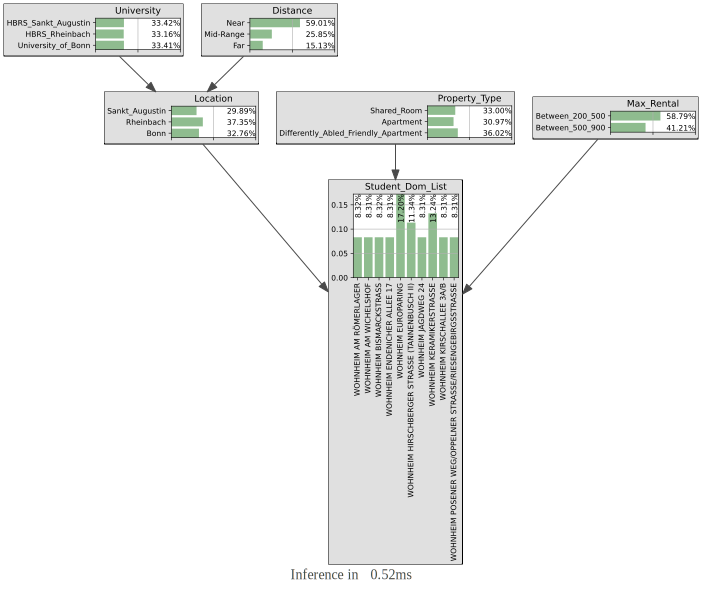

In [98]:
gnb.showInference(bn,evs={},size='10')


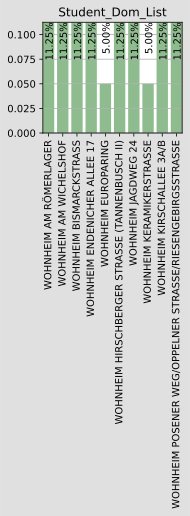

In [59]:
# Used to show the probability values of the individual nodes in the network 
gnb.showProba(ie.posterior(Student_Dom_List))

## Failed Trial Cells are below

In [ ]:
# Trial 4 (This method will not work as the sumaation of probabilities does not add up to 1)

# Adding CPT's

'''
The fill with values are initalised and they are initialised as per our validated assumptions.
'''

bn.cpt(Distance).fillWith([0.6,0.25,0.15])
bn.cpt(University).fillWith([0.3334,0.3333,0.3333])
bn.cpt(Max_Rental).fillWith([0.6,0.4])
bn.cpt(Property_Type).fillWith([0.3334,0.3333,0.3333])

# # LHS - Part of the BN Chart
# # For Based on the distance the probability is given

# # This has to be changed with 3 prob. values this why it is throwing errors --> [Error Resolved]
# '''
# The probabilty of the below values are given based on the distance from the university and the location of interest.
# '''
# # Distance = ['Near', 'Mid-Range', 'Far']
# # Location = ['Sankt_Augustin', 'Rheinbach', 'Bonn']
bn.cpt(Location)[{'University': 'HBRS_Sankt_Augustin','Distance': 'Near'}] = [0.6,0.25,0.15]
bn.cpt(Location)[{'University': 'HBRS_Sankt_Augustin','Distance': 'Mid-Range'}] = [0.25,0.6,0.15]
bn.cpt(Location)[{'University': 'HBRS_Sankt_Augustin','Distance': 'Far'}] = [0.15,0.25,0.6]

bn.cpt(Location)[{'University': 'HBRS_Rheinbach','Distance': 'Near'}] = [0.15,0.25,0.6]
bn.cpt(Location)[{'University': 'HBRS_Rheinbach','Distance': 'Mid-Range'}] = [0.6,0.25,0.15]
bn.cpt(Location)[{'University': 'HBRS_Rheinbach','Distance': 'Far'}] = [0.25,0.6,0.15]

bn.cpt(Location)[{'University': 'University_of_Bonn','Distance': 'Near'}] = [0.15,0.25,0.6]
bn.cpt(Location)[{'University': 'University_of_Bonn','Distance': 'Mid-Range'}] = [0.25,0.6,0.15]
bn.cpt(Location)[{'University': 'University_of_Bonn','Distance': 'Far'}] = [0.6,0.25,0.15]

# # Final Node
# '''
# The values are given based on the distance, property type and the max rental amount for every single student domitory.
# The list of student domitory is given below.
# 1. WOHNHEIM AM RÖMERLAGER 
# 2. WOHNHEIM AM WICHELSHOF   
# 3. WOHNHEIM BISMARCKSTRASS 
# 4. WOHNHEIM ENDENICHER ALLEE 17
# 5. WOHNHEIM EUROPARING  (Sankt_Augustin)
# 6. WOHNHEIM HIRSCHBERGER STRASSE (TANNENBUSCH II) ("This Dormitory has differently abled friendly apartments")
# 7. WOHNHEIM JAGDWEG 24
# 8. WOHNHEIM KERAMIKERSTRASSE  (Rheinbach)) 
# 9. WOHNHEIM KIRSCHALLEE 3A/B   
# 10. WOHNHEIM POSENER WEG/OPPELNER STRASSE/RIESENGEBIRGSSTRASSE
# '''

# what should be the value given to the things whcih are not possible to attain 1 probability
# Why only the dom of sankt augustin is spiking up???

bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.1,0.1,0.1,0.1,0.6,0.1,0.1,0.1,0.1,0.1]
# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.1,0.1,0.1,0.1,0.6,0.1,0.1,0.1,0.1,0.1]
# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]

bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.6,0.1,0.1]
# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.6,0.1,0.1]
# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]

bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.6,0.6,0.6,0.6,0.1,0.6,0.6,0.1,0.6,0.6]
# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.6,0.6,0.6,0.6,0.1,0.6,0.6,0.1,0.6,0.6]
bn.cpt(Student_Dom_List)[{'Location': 'Sankt_Augustin','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.6,0.6,0.6,0.6,0.1,0.9,0.6,0.1,0.6,0.6]

# ## For Rheinbach
# bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.0448,0.0444,0.0444,0.0444,0.0444,0.0444,0.0444,0.6,0.0444,0.0444]
# # bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# # bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# # bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.6,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.0444,0.0444,0.0444,0.0444,0.044,0.0444,0.0444,0.6,0.0444,0.0444]
# # bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]

# bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.1125,0.1125,0.1125,0.1125,0.05,0.1125,0.1125,0.05,0.1125,0.1125]
# # bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# # bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# # bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.1125,0.1125,0.1125,0.1125,0.05,0.1125,0.1125,0.05,0.1125,0.1125]
# bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.0429,0.0429,0.0429,0.0429,0.05,0.6,0.0429,0.05,0.0429,0.0429]

# bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.0448,0.0444,0.0444,0.0444,0.6,0.0444,0.0444,0.0444,0.0444,0.0444]
# # bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# # bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# # bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.0444,0.0444,0.0444,0.0444,0.6,0.0444,0.0444,0.0444,0.0444,0.0444]
# # bn.cpt(Student_Dom_List)[{'Location': 'Rheinbach','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]

# ## For Bonn
# bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.1125,0.1125,0.1125,0.1125,0.05,0.1125,0.1125,0.05,0.1125,0.1125]
# # bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}]  = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# # bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Near','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# # bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.1125,0.1125,0.1125,0.1125,0.05,0.1125,0.1125,0.05,0.1125,0.1125]
# bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Near','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.0429,0.0429,0.0429,0.0429,0.05,0.6,0.0429,0.05,0.0429,0.0429]

# bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.0448,0.0444,0.0444,0.0444,0.0444,0.0444,0.0444,0.6,0.0444,0.0444]
# # bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# # bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Mid-Range','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# # bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.0444,0.0444,0.0444,0.0444,0.044,0.0444,0.0444,0.6,0.0444,0.0444]
# # bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Mid-Range','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]

# bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Shared_Room'}] = [0.0448,0.0444,0.0444,0.0444,0.6,0.0444,0.0444,0.0444,0.0444,0.0444]
# # bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# # bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Far','Max_Rental': 'Between_200_500','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.6,0.025,0.025,0.025,0.025,0.025]
# # bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Shared_Room'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
# bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Apartment'}] = [0.0444,0.0444,0.0444,0.0444,0.6,0.0444,0.0444,0.0444,0.0444,0.0444]
# # bn.cpt(Student_Dom_List)[{'Location': 'Bonn','Distance': 'Far','Max_Rental': 'Between_500_900','Property_Type': 'Differently_Abled_Friendly_Apartment'}] = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
